# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

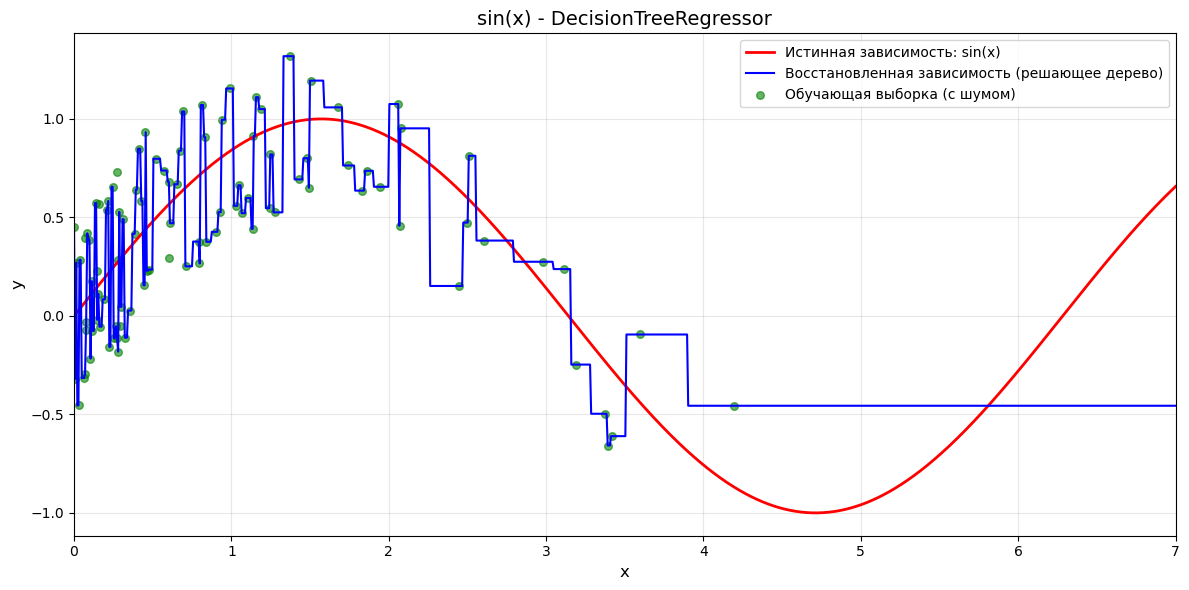

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(13)

#1
X_train = np.random.exponential(scale=1.0, size=sample_size)

#2
y_train = f(X_train) + np.random.uniform(low=-0.5, high=0.5, size=sample_size)
X_train_2d = X_train.reshape(-1, 1)

#3
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train_2d, y_train)

X_plot = linspace.reshape(-1, 1)
y_pred = tree.predict(X_plot)

#4
plt.figure(figsize=(12, 6))

plt.plot(linspace, f(linspace), 'r-', linewidth=2, label='Истинная зависимость: sin(x)')
plt.plot(linspace, y_pred, 'b-', linewidth=1.5, label='Восстановленная зависимость (решающее дерево)')
plt.scatter(X_train, y_train, color='green', alpha=0.6, s=30, label='Обучающая выборка (с шумом)')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('sin(x) - DecisionTreeRegressor', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, 7])
plt.tight_layout()
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

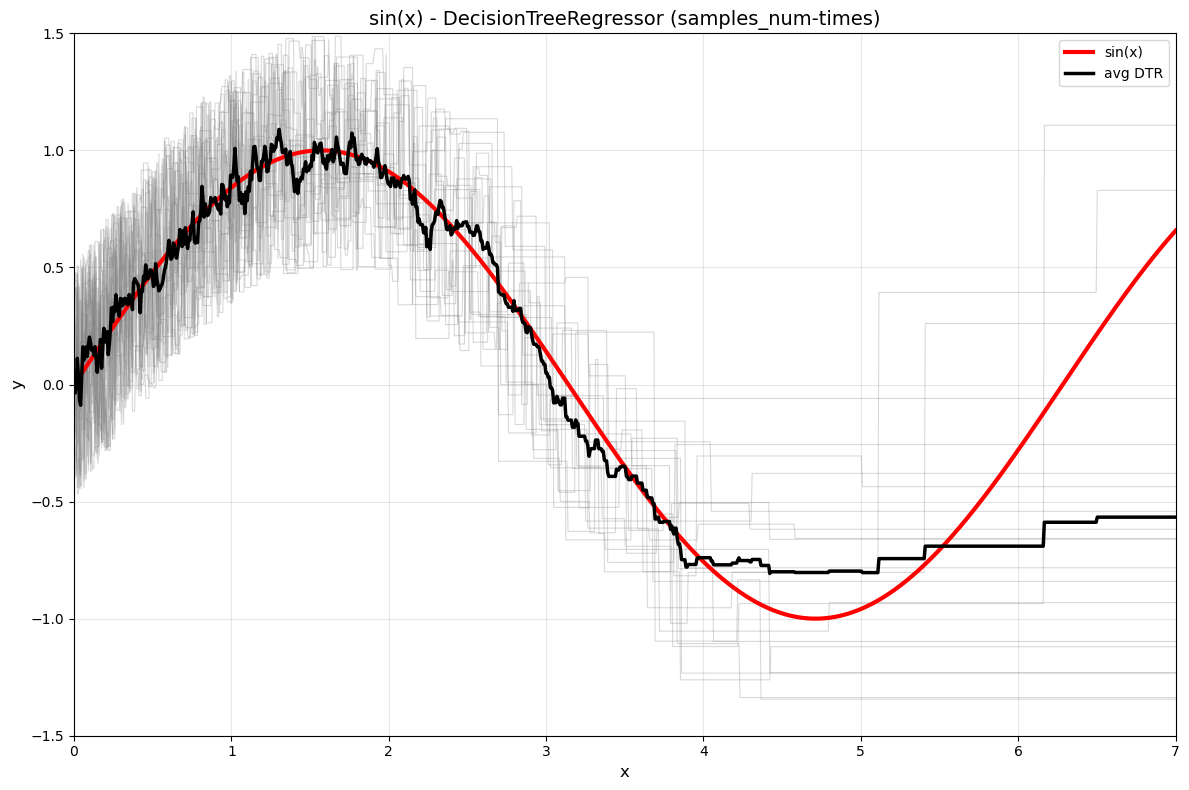

In [11]:

X_plot = linspace.reshape(-1, 1)
all_predictions = np.zeros((samples_num, len(linspace)))

average_prediction = np.zeros(len(linspace))

plt.figure(figsize=(12, 8))

for i in range(samples_num):
    X_train = np.random.exponential(scale=1.0, size=sample_size)
    
    y_train = f(X_train) + np.random.uniform(low=-0.5, high=0.5, size=sample_size)

    X_train_2d = X_train.reshape(-1, 1)

    # We can randomize random_state with i, but we dont
    tree = DecisionTreeRegressor(random_state=i)
    tree.fit(X_train_2d, y_train)
    
    y_pred = tree.predict(X_plot)
    
    all_predictions[i] = y_pred
    
    plt.plot(linspace, y_pred, color="gray", alpha=0.3, linewidth=0.8)

average_prediction = np.mean(all_predictions, axis=0)

plt.plot(linspace, f(linspace), color="red", linewidth=3, label='sin(x)')
plt.plot(linspace, average_prediction, color="black", linewidth=2.5, label='avg DTR')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('sin(x) - DecisionTreeRegressor (samples_num-times)', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, 7])
plt.ylim([-1.5, 1.5])
plt.tight_layout()
plt.show()


__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

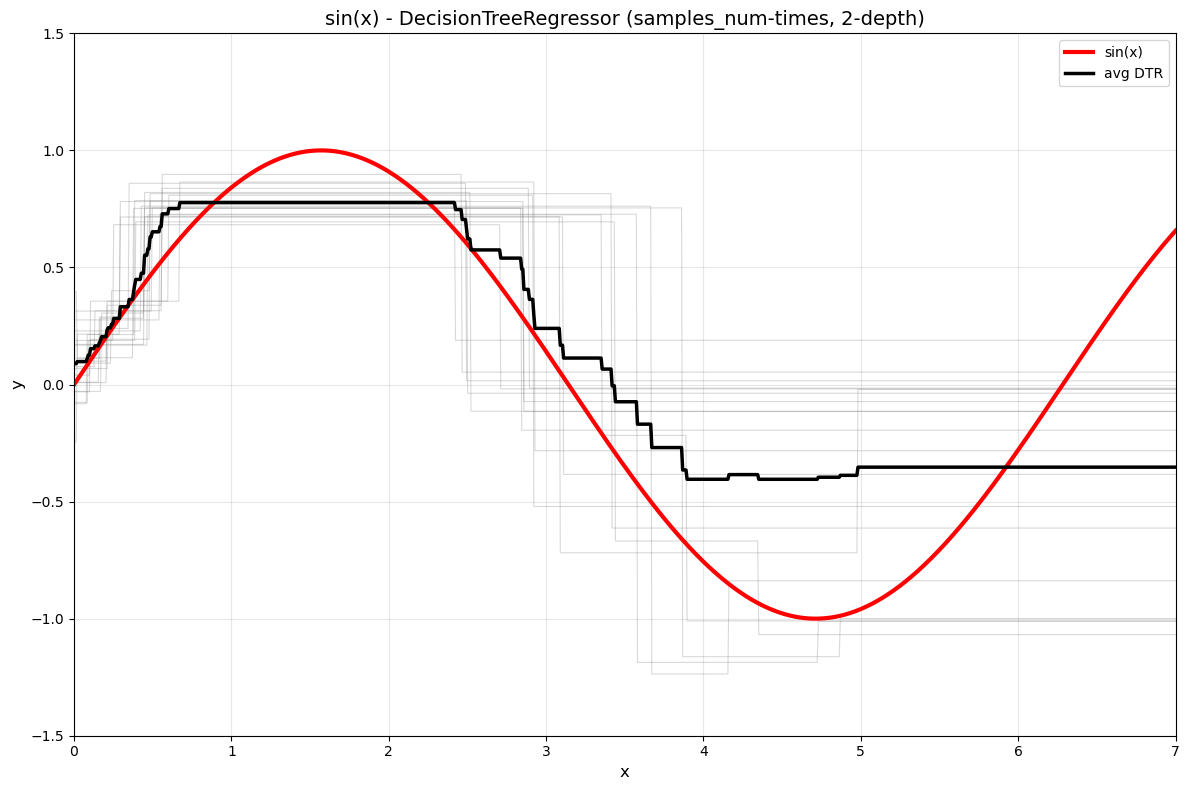

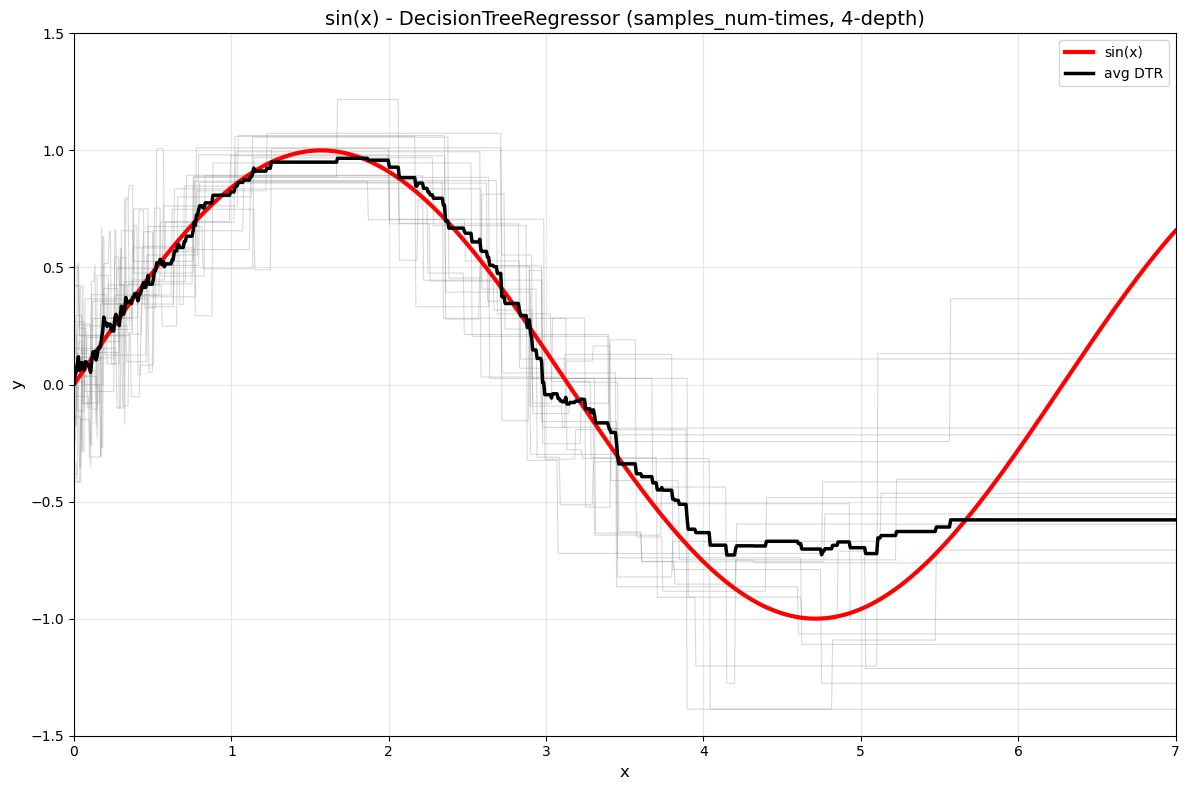

In [13]:

def depth(max_depth_value):
    X_plot = linspace.reshape(-1, 1)
    all_predictions = np.zeros((samples_num, len(linspace)))
    
    plt.figure(figsize=(12, 8))
    
    for i in range(samples_num):
        X_train = np.random.exponential(scale=1.0, size=sample_size)
        
        y_train = f(X_train) + np.random.uniform(low=-0.5, high=0.5, size=sample_size)

        X_train_2d = X_train.reshape(-1, 1)

        tree = DecisionTreeRegressor(max_depth=max_depth_value, random_state=i)
        tree.fit(X_train_2d, y_train)

        y_pred = tree.predict(X_plot)

        all_predictions[i] = y_pred

        plt.plot(linspace, y_pred, color="gray", alpha=0.3, linewidth=0.8)

    average_prediction = np.mean(all_predictions, axis=0)

    plt.plot(linspace, f(linspace), color="red", linewidth=3, label='sin(x)')

    plt.plot(linspace, average_prediction, color="black", linewidth=2.5, 
             label='avg DTR')
    
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(f'sin(x) - DecisionTreeRegressor (samples_num-times, {max_depth_value}-depth)', fontsize=14)
    plt.legend(loc='upper right', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xlim([0, 7])
    plt.ylim([-1.5, 1.5])
    plt.tight_layout()
    plt.show()

depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**

- На неограниченной глубине мы лишь видем sin с небольшой ошибкой, но откланение близко к нулю
- На глубине 4 мы видем sin с ошибкой побольше, и на некоторых промежутках она довольно постоянна, поэтому график на этих промежутках выглядит смещенным
- На глубине 2 тоже, что и на глубине 4, но намного выраженнее

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [54]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [55]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from 'C:\\Users\\cat\\Desktop\\task7_dstree_practice\\hw3code.py'>

Признак 1: Лучший порог = 0.6150, Значение Джини = -0.4540
Признак 2: Лучший порог = 0.4250, Значение Джини = -0.4650
Признак 3: Лучший порог = 0.3600, Значение Джини = -0.4660
Признак 4: Лучший порог = 0.4000, Значение Джини = -0.4519
Признак 5: Лучший порог = 0.3350, Значение Джини = -0.0861


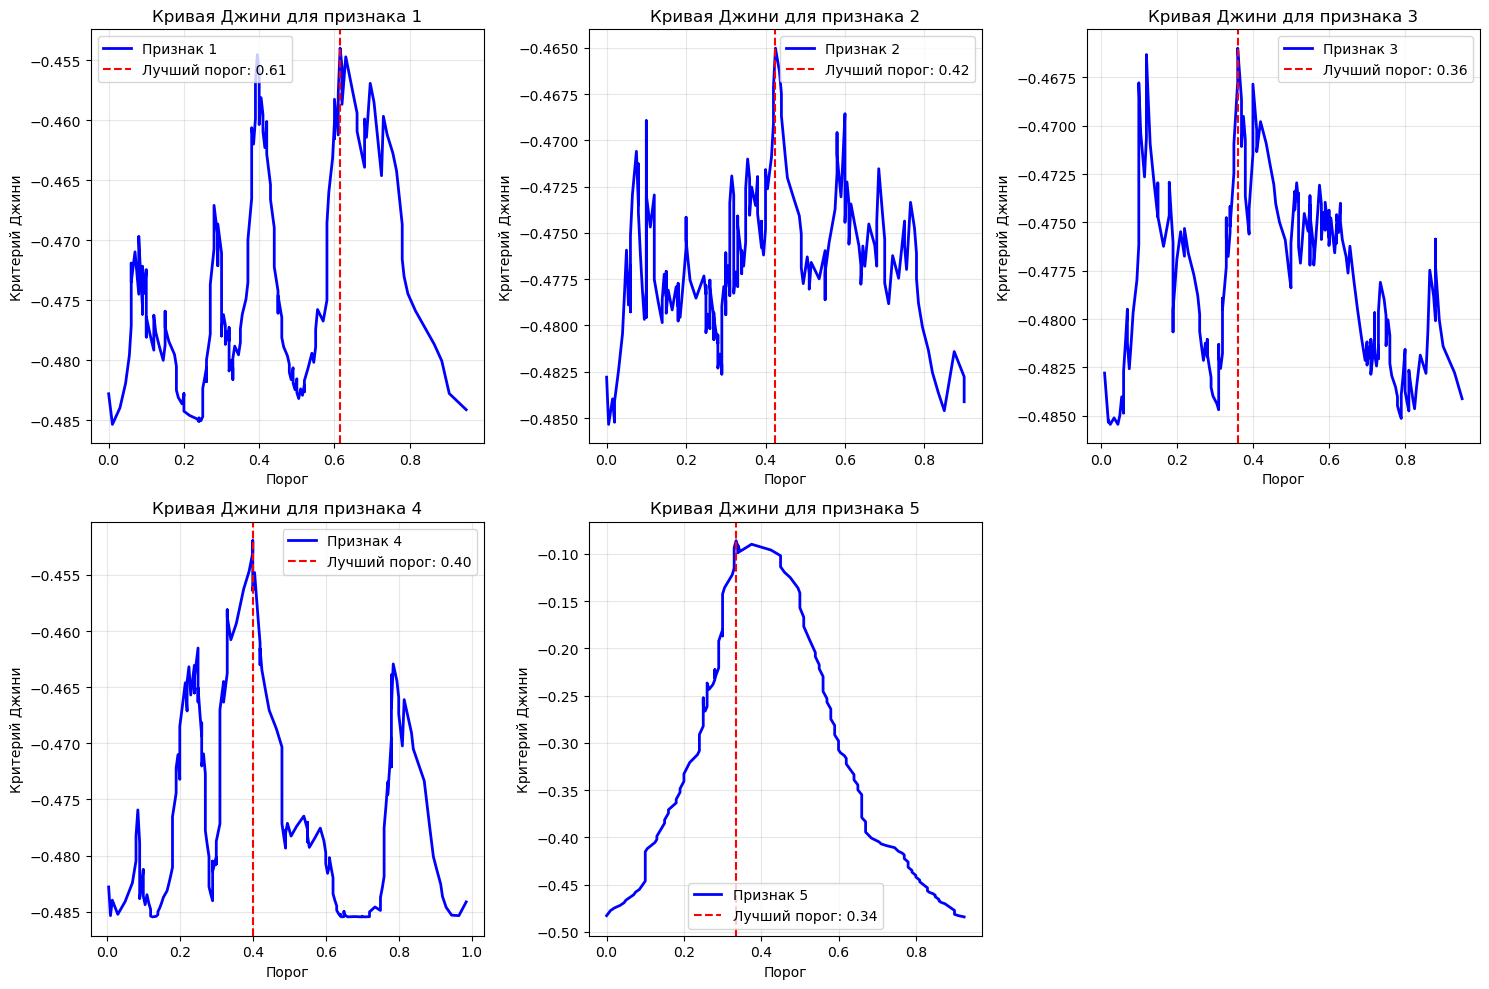

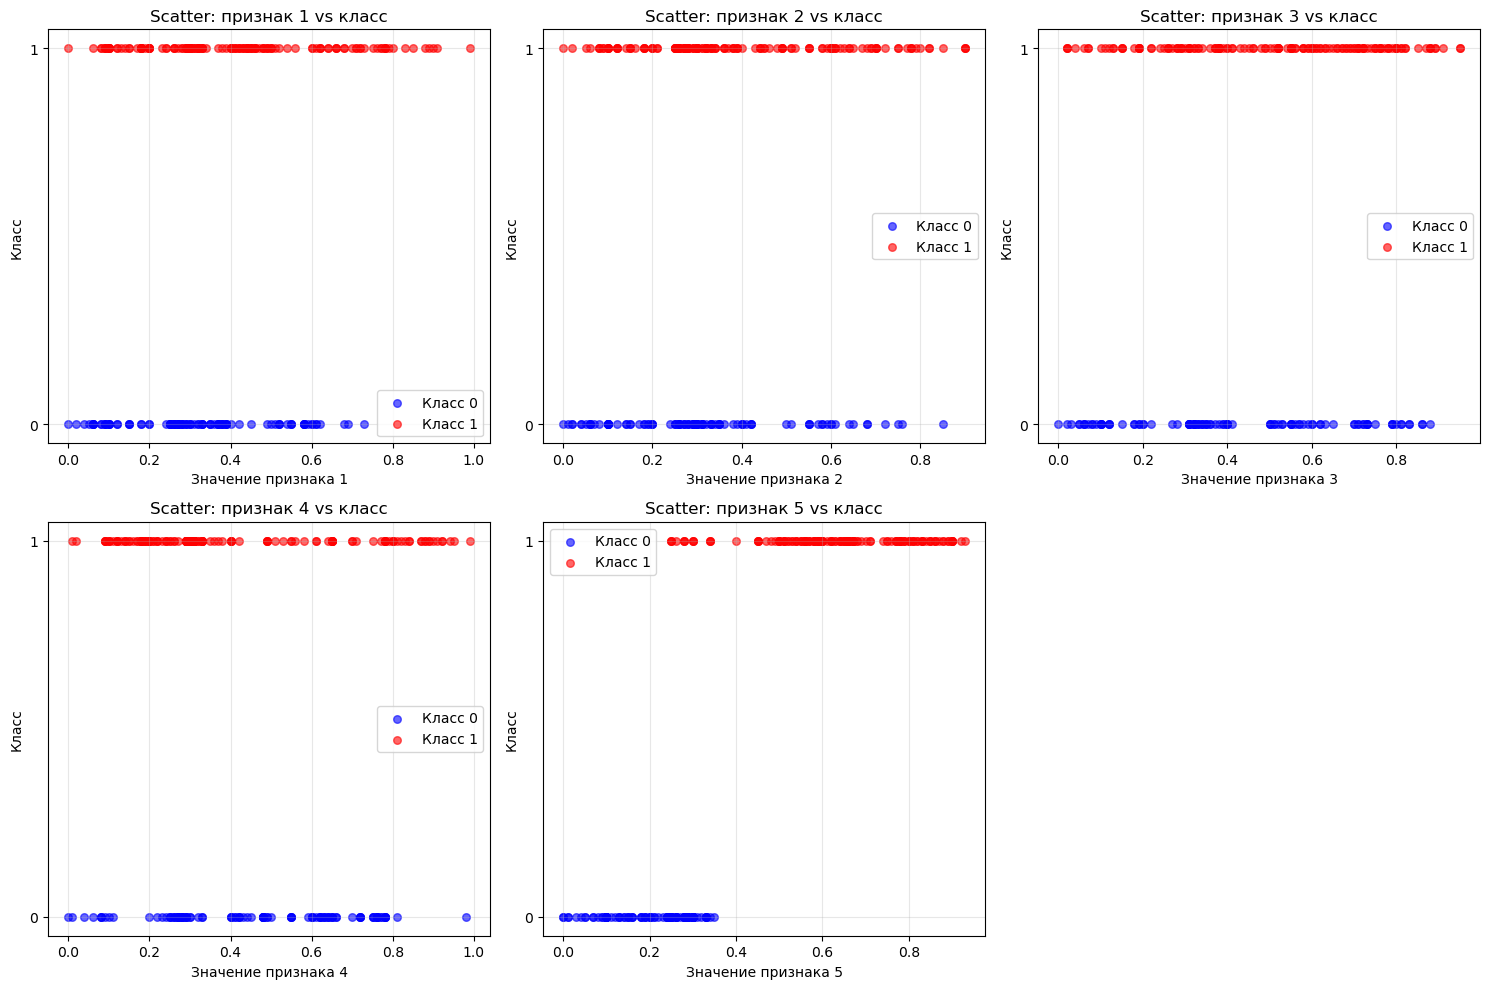

In [56]:

X = data.iloc[:, :5].values  # признаки
Y = data.iloc[:, 5].values   # цель

reload(hw3code)

plt.figure(figsize=(15, 10))

# Кривая Джини по i-th признаку
for i in range(5):
    plt.subplot(2, 3, i+1)
    
    feature_values = X[:, i]

    result = hw3code.find_best_split(feature_values, Y)
    
    x, y, bx, by = result
        
    # Строим кривую Джини
    plt.plot(x, y, 'b-', linewidth=2, label=f'Признак {i+1}')
        
    # Отмечаем лучший порог
    plt.axvline(x=bx, color='r', linestyle='--', 
                   label=f'Лучший порог: {bx:.2f}')
        
    plt.title(f'Кривая Джини для признака {i+1}')
    plt.xlabel('Порог')
    plt.ylabel('Критерий Джини')
    plt.legend()
    plt.grid(True, alpha=0.3)
        
    print(f"Признак {i+1}: Лучший порог = {bx:.4f}, Значение Джини = {by:.4f}")


plt.tight_layout()
plt.show()

# scatter
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 3, i+1)
    
    feature_values = X[:, i]
    
    # Разделяем точки по классам
    class_0_mask = Y == 0
    class_1_mask = Y == 1
    
    # 0
    plt.scatter(feature_values[class_0_mask], Y[class_0_mask], 
                alpha=0.6, color='blue', label='Класс 0', s=30)
    
    # 1
    plt.scatter(feature_values[class_1_mask], Y[class_1_mask], 
                alpha=0.6, color='red', label='Класс 1', s=30)
    
    plt.title(f'Scatter: признак {i+1} vs класс')
    plt.xlabel(f'Значение признака {i+1}')
    plt.ylabel('Класс')
    plt.yticks([0, 1])
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

- По признаку 5, он самый высокий
- Да, на 5 графике scatter наблюдаем почти четкое разделение 0 и 1 класса (0 .. 0.35 и от 0.4 до 1 с небольшими погрешностями)
- Кривая хорошего признака содержит 1 холм и мало шума
- Кривая плохого признака содержит много холмов, их пики могут находится на примерно равной высоте

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# mashroom
data = pd.read_csv('msh.csv', header=None)

X = data.iloc[:, 1:]  # признаки
y = data.iloc[:, 0]   # цель

# Категории |-> числа
# Для каждого столбца применяем LabelEncoder
X_encoded = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))
y_encoded = LabelEncoder().fit_transform(y.astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, 
    test_size=0.5,
    random_state=13,
    stratify=y_encoded
)

clf = DecisionTreeClassifier(random_state=13)
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление accuracy
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print(f"Точность модели: {accuracy:.4f}")
print(f"Глубина дерева: {clf.get_depth()}")
print(f"Количество листьев: {clf.get_n_leaves()}")

# Важность признаков
#for i, importance in enumerate(clf.feature_importances_):
#    if importance > 0.01: # только важные
#        print(f"Признак {i+1}: {importance:.3f}")

Точность модели: 1.0000
Глубина дерева: 7
Количество листьев: 20


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

train_data = pd.read_csv('external/train.csv', nrows=10000)
y = train_data['target']
X = train_data.drop(['ID', 'target'], axis=1)

# Вещественные признаки + заполнение пропусков
X_numeric = X.select_dtypes(include=[np.number]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.3, random_state=42, stratify=y
)

# Создание классификаторов
classifiers = [
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
    ('BaggingClassifier (100 деревьев)', 
     BaggingClassifier(DecisionTreeClassifier(random_state=42), 
                       n_estimators=100, random_state=42)),
    ('RandomForestClassifier (100 деревьев)', 
     RandomForestClassifier(n_estimators=100, random_state=42))
]

# Оценка
print("Результаты кросс-валидации (cv=3):")
for name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print(f"{name}: {np.mean(scores):.4f} (фолды: {scores})")

Результаты кросс-валидации (cv=3):
DecisionTreeClassifier: 0.6666 (фолды: [0.66923736 0.65452207 0.67595371])
BaggingClassifier (100 деревьев): 0.7541 (фолды: [0.75706941 0.75182169 0.75353622])
RandomForestClassifier (100 деревьев): 0.7530 (фолды: [0.75664096 0.74710673 0.75525075])


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

Деревьев: 100, Accuracy: 0.7507
Деревьев: 200, Accuracy: 0.7517
Деревьев: 300, Accuracy: 0.7530
Деревьев: 400, Accuracy: 0.7510
Деревьев: 500, Accuracy: 0.7523
Деревьев: 600, Accuracy: 0.7517
Деревьев: 700, Accuracy: 0.7510
Деревьев: 800, Accuracy: 0.7500
Деревьев: 900, Accuracy: 0.7520
Деревьев: 1000, Accuracy: 0.7503


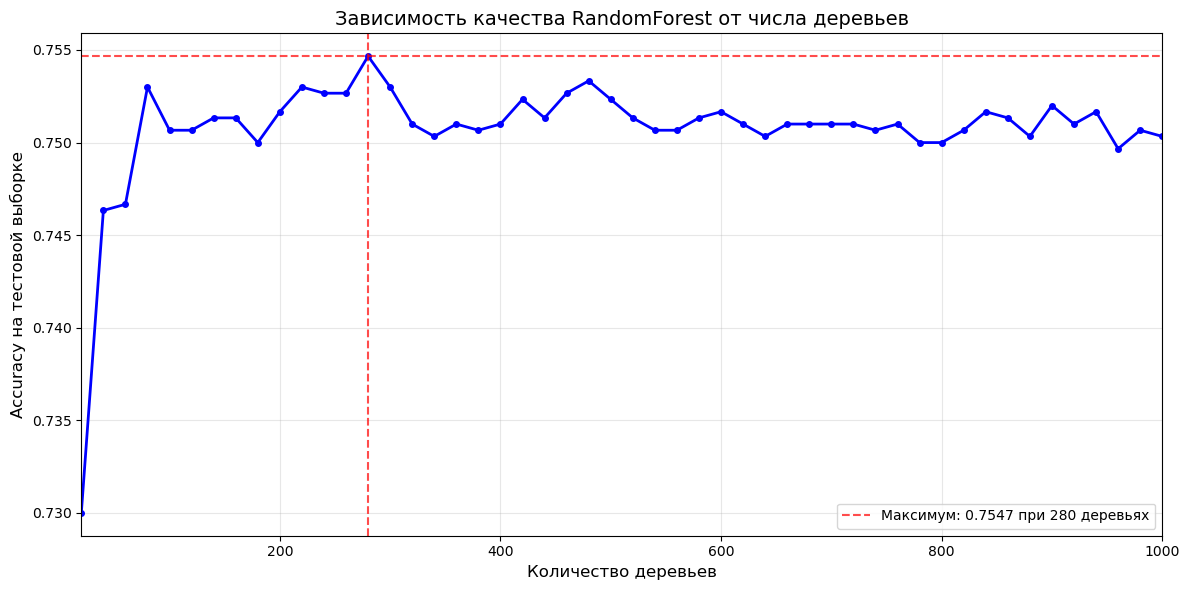

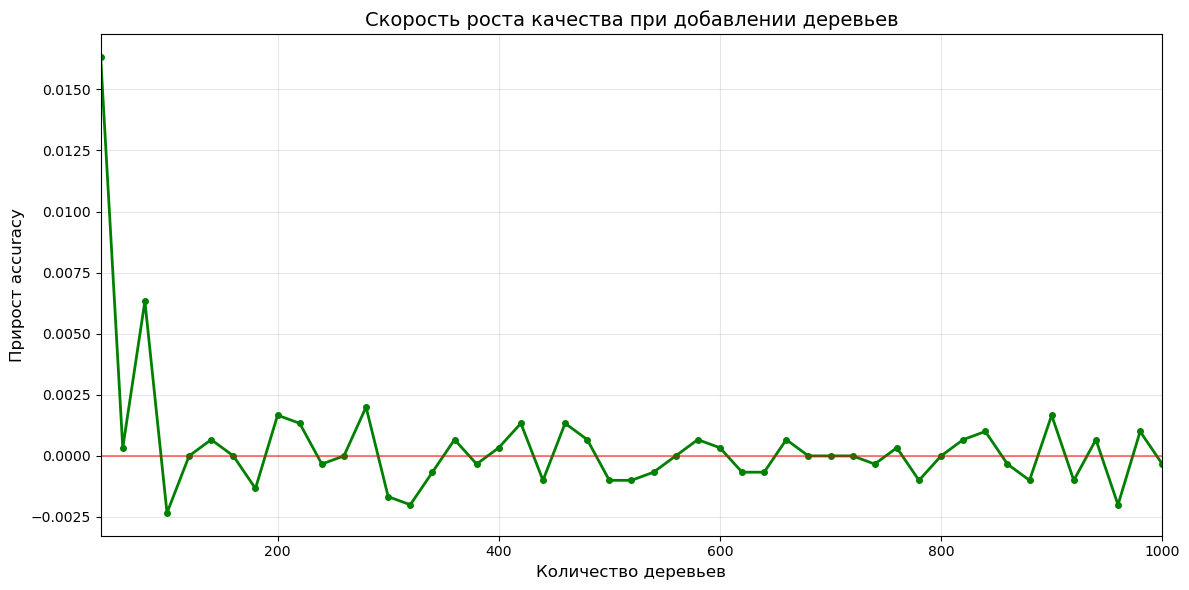

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

train_data = pd.read_csv('external/train.csv', nrows=10000)
y = train_data['target']
X = train_data.drop(['ID', 'target'], axis=1)

X_filled = X.select_dtypes(include=[np.number]).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(
    X_filled, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=20,
    warm_start=True,
    random_state=42,
    n_jobs=-1
)

# Перебираем количество деревьев от 20 до 1000 с шагом 20
n_trees_range = range(20, 1001, 20)
accuracies = []

for n_trees in n_trees_range:
    rf.set_params(n_estimators=n_trees)
    
    # При warm_start=True дообучаются только новые деревья
    rf.fit(X_train, y_train)
    
    # Тестовая выборка
    accuracy = rf.score(X_test, y_test)
    accuracies.append(accuracy)
    
    # Прогресс каждые 100 деревьев
    if n_trees % 100 == 0:
        print(f"Деревьев: {n_trees}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(n_trees_range, accuracies, 'b-', linewidth=2, marker='o', markersize=4)
plt.xlabel('Количество деревьев', fontsize=12)
plt.ylabel('Accuracy на тестовой выборке', fontsize=12)
plt.title('Зависимость качества RandomForest от числа деревьев', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim([20, 1000])

# max
max_acc = max(accuracies)
max_idx = n_trees_range[accuracies.index(max_acc)]
plt.axhline(y=max_acc, color='r', linestyle='--', alpha=0.7, 
            label=f'Максимум: {max_acc:.4f} при {max_idx} деревьях')
plt.axvline(x=max_idx, color='r', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

# производная
plt.figure(figsize=(12, 6))
differences = np.diff(accuracies)
plt.plot(n_trees_range[1:], differences, 'g-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.5)
plt.xlabel('Количество деревьев', fontsize=12)
plt.ylabel('Прирост accuracy', fontsize=12)
plt.title('Скорость роста качества при добавлении деревьев', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim([40, 1000])
plt.tight_layout()
plt.show()